https://www.kaggle.com/code/anokas/data-exploration-analysis

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


ROOT_PATH = input("ROOT_PATH = ")  # ../../../../datasets/planet-from-space/
print('# File sizes')
for f in os.listdir(ROOT_PATH):
    if not os.path.isdir(ROOT_PATH + f):
        print(f.ljust(30) + str(round(os.path.getsize(ROOT_PATH + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize(ROOT_PATH+f+'/'+x)/1000000 for x in os.listdir(ROOT_PATH + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

ROOT_PATH = ../../../../datasets/planet-from-space/
# File sizes
train.csv                     1.43MB
train-jpg                     634.68MB (40479 files)
test                          958.88MB (61191 files)


In [6]:
df_train = pd.read_csv(ROOT_PATH + 'train.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

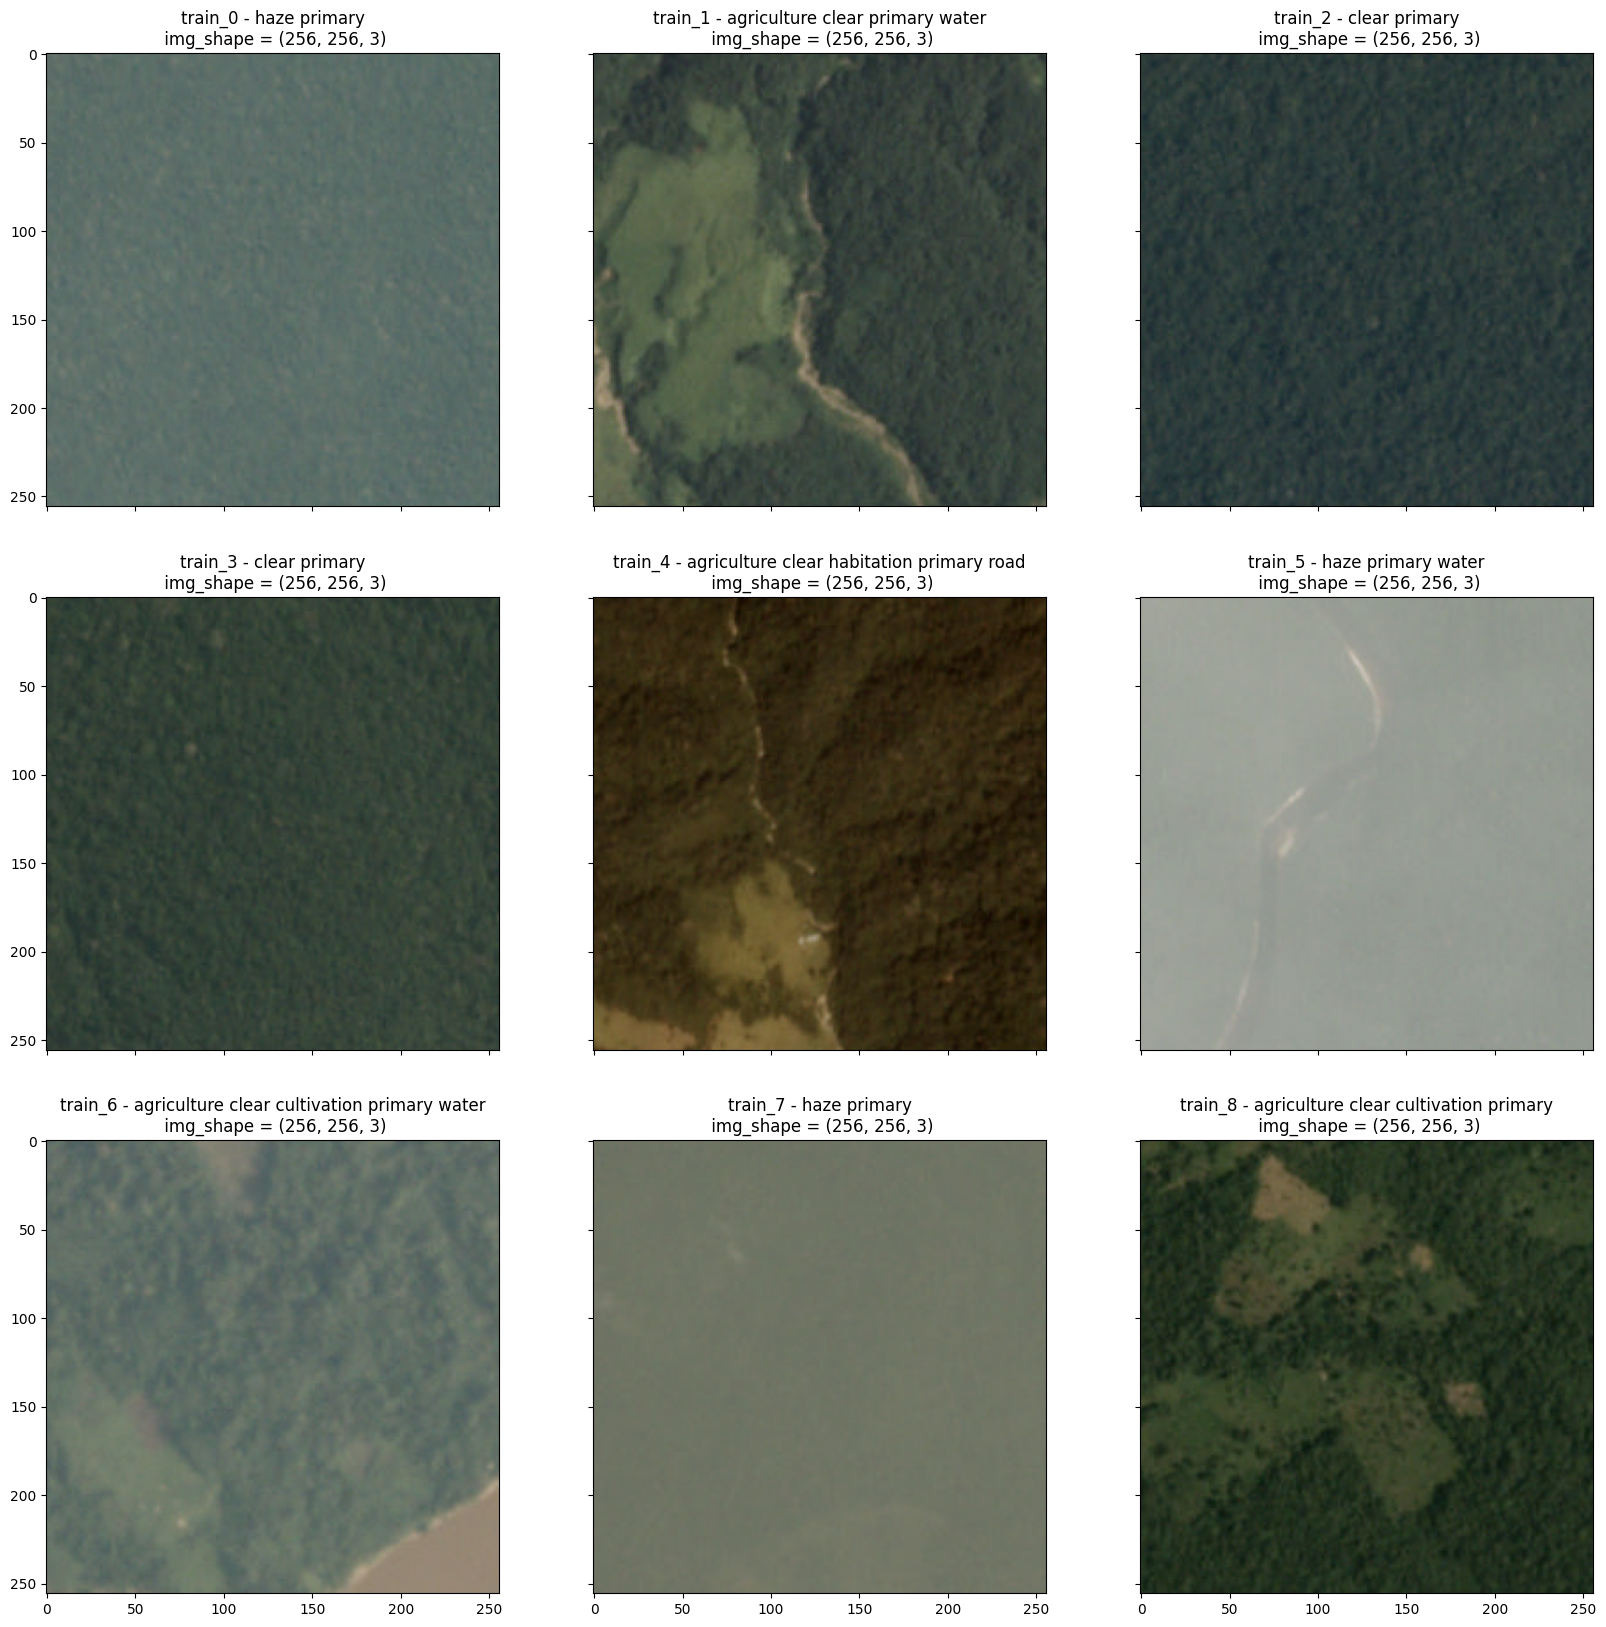

In [13]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread(ROOT_PATH + 'train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title(f'{f} - {l}\n img_shape = {img.shape}')
    i += 1
    
plt.show()